<a href="https://colab.research.google.com/github/wunderkimiko/sales-predictions/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
sales_predictionsDF = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Data Sets/sales_predictions.csv')
sales_predictionsDF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
sales2df = sales_predictionsDF.rename(columns={'Item_Identifier':'Item Identifier', 'Item_Weight':'Item Weight', 
                                               'Item_Fat_Content':'Item Fat Content', 'Item_Fat_Content':'Item Fat Content',
                                               'Item_Visibility':'Item Visibility', 'Item_Type':'Item Type', 'Item_MRP':'Item MRP',
                                               'Outlet_Identifier':'Outlet Identifier', 'Outlet_Establishment_Year':'Outlet Establishment Year',
                                               'Outlet_Size':'Outlet Size', 'Outlet_Location_Type':'Outlet Location Type',
                                               'Outlet_Type':'Outlet Type', 'Item_Outlet_Sales':'Item Outlet Sales'})
sales2df.head()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
sales2df['Item Fat Content'].replace(to_replace='LF', value='Low Fat', inplace=True)

In [33]:
sales2df['Item Fat Content'].replace(to_replace='low fat', value='Low Fat', inplace=True)

In [32]:
sales2df['Item Fat Content'].replace(to_replace='reg', value='Regular', inplace=True)

In [35]:
sales2df['Item Fat Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item Fat Content, dtype: int64

In [21]:
sales2df['Item Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item Type, dtype: int64

In [39]:
sales = sales2df.groupby('Item Type')['Item Outlet Sales'].mean().reset_index(name= 'Average Sales')
sales

,Item Type,Average Sales
0,Baking Goods,1952.971207
1,Breads,2204.132226
2,Breakfast,2111.808651
3,Canned,2225.194904
4,Dairy,2232.542597
5,Frozen Foods,2132.867744
6,Fruits and Vegetables,2289.009592
7,Hard Drinks,2139.221622
8,Health and Hygiene,2010.000265
9,Household,2258.784300


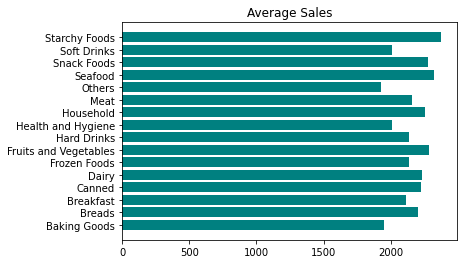

In [43]:
plt.barh(sales['Item Type'], sales['Average Sales'], color=('teal'))
plt.title('Average Sales');

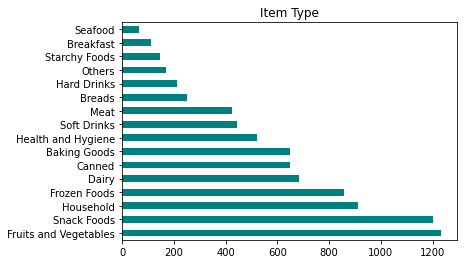

In [37]:
pd.value_counts(sales2df['Item Type']).plot.barh(color=['teal'])
plt.title('Item Type');

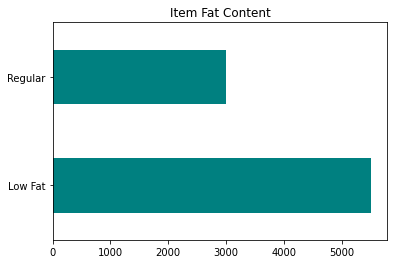

In [38]:
pd.value_counts(sales2df['Item Fat Content']).plot.barh(color=['teal'])
plt.title('Item Fat Content');


In [47]:
fatsales = sales2df.groupby('Item Fat Content')['Item Outlet Sales'].mean().reset_index(name='Avg Sales Fat Content')
fatsales

,Item Fat Content,Avg Sales Fat Content
0,Low Fat,2157.711534
1,Regular,2224.561170


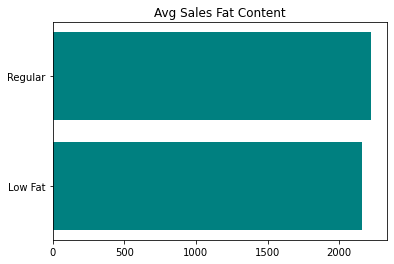

In [51]:
plt.barh(fatsales['Item Fat Content'], fatsales['Avg Sales Fat Content'], color=('teal'))
plt.title('Avg Sales Fat Content');